In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

%matplotlib inline

# Helper functions

In [81]:
def print_results(predictions = None):
    plt.figure()
    
    if predictions is not None:
        ax1 = plt.subplot(1, 2, 1)
        ax1.set_title('Predicted')
        ones = X[np.argwhere(predictions>0.5)]
        zeroes = X[np.argwhere(predictions<=0.5)]
        ax1.plot([s[0,0] for s in zeroes], [s[0,1] for s in zeroes], '.', color = 'red')
        ax1.plot([s[0,0] for s in ones], [s[0,1] for s in ones], '.', color = 'blue')

        ax2 = plt.subplot(1, 2, 2)
    else:
        ax2 = plt.subplot(1, 1, 1)
        
    ax2.set_title('Actual')
    ones = X[np.argwhere(Y==1)]
    zeroes = X[np.argwhere(Y==0)]
    ax2.plot([s[0,0] for s in zeroes], [s[0,1] for s in zeroes], '.', color = 'red')
    ax2.plot([s[0,0] for s in ones], [s[0,1] for s in ones], '.', color = 'blue')
    
def accuracy(y, y_hat):
    y_hat_mod = [1 if x > 0.5 else 0 for x in y_hat]
    correct = 0
    for i in range(len(y)):
        if y_hat_mod[i] == y[i]:
            correct += 1
    return (float(correct)/float(len(y)))

# Generating data

In [54]:
X = []
Y = []
limit_x1 = int(100)
limit_x2 = int(100)
bounds_x1 = np.array([18., 90.])
bounds_x2 = np.array([19., 90.])
div_x1 = 10
div_x2 = 10

for i in range(0,limit_x1):
    for j in range(0,limit_x2):
        X.append([float(i/div_x1),float(j/div_x2)])
        y = 1 if i > bounds_x1[0] and i < bounds_x1[1] and j > bounds_x2[0] and j < bounds_x2[1] else 0
        Y.append([y])
        
X = np.array(X, ndmin=2)
Y = np.array(Y, ndmin=2)

print(len(Y[np.argwhere(Y==1)]))
print(len(Y[np.argwhere(Y==0)]))

4970
5030


As we can see, the data is very well splitted (meaning that there is almost equal amount of ones and zeroes in data, so the dataset is not inclined to something)

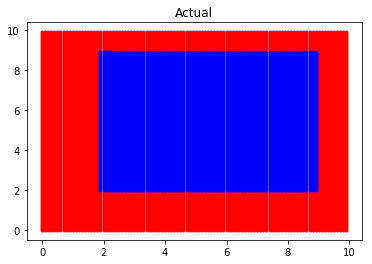

In [57]:
print_results()

Also, the data in meaningfully distributed, so nn should be able to find the pattern

In [82]:
X_opt = X / X.max() #gonna use that later, to feed nn somewhat normalized values

# Tensorflow model

I am going to create a simple three-layered neural network

In [83]:
x_ph = tf.placeholder(tf.float32, [None, 2]) #placeholder for features
y_ph = tf.placeholder(tf.float32, [None, 1]) #placeholder for labels

In [84]:
# Weights
W0 = tf.Variable(tf.truncated_normal((2, 5)), name="W0")
b0 = tf.Variable(tf.zeros((1, 5)), name="b0")
W1 = tf.Variable(tf.truncated_normal((5, 2)), name="W1")
b1 = tf.Variable(tf.zeros((1, 2)), name="b1")
W2 = tf.Variable(tf.truncated_normal((2, 1)), name="W2")
b2 = tf.Variable(tf.zeros((1, 1)), name="b2")

In [85]:
# Forward propagation
l0 = tf.nn.sigmoid(x_ph @ W0 + b0)
l1 = tf.nn.sigmoid(l0 @ W1 + b1)
output = tf.nn.sigmoid(l1 @ W2 + b2)

In [86]:
# Backpropagation
# Squared Error Approach
# error = (y_ph - output) ** 2

# Cross entropy approach from https://www.tensorflow.org/get_started/mnist/beginners
error = tf.reduce_mean(-tf.reduce_sum(y_ph * tf.log(output), reduction_indices=[1]))

In [87]:
init = tf.global_variables_initializer()
sess = tf.InteractiveSession() # open interactive session
epochs = 1000
learning_rate = 0.1

In [88]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(error)
sess.run(init)

In [89]:
for i in range(epochs):
    sess.run(optimizer, feed_dict={x_ph: X_opt, y_ph: Y})

In [90]:
predictions = sess.run(output, feed_dict={x_ph: X_opt, y_ph: Y})

0.497


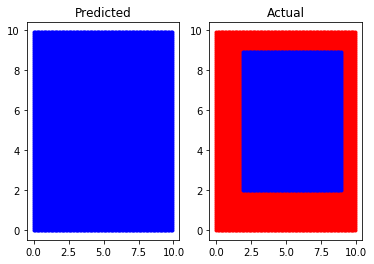

In [91]:
print(accuracy(Y,predictions))
print_results(predictions)

In [92]:
sess.close()

# The neural network performs really bad.
Presented configuration was tried on the very similar data on the tensorflow playground site, where it performed quite well.
The link to the playground: http://playground.tensorflow.org/#activation=sigmoid&batchSize=30&dataset=circle&regDataset=reg-plane&learningRate=0.1&regularizationRate=0&noise=0&networkShape=5,2&seed=0.53191&showTestData=false&discretize=false&percTrainData=90&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false